In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import glob

In [20]:
image_file_names = glob.glob('boards/*.jpeg')
print(image_file_names[0])

boards\1b1B1Qr1-7p-6r1-2P5-4Rk2-1K6-4B3-8.jpeg


In [28]:
def file_name_to_label_array(file_name):
    fen = file_name[7:-5]
    label_arr, fen_rows = [], fen.split('-')

    for fen_row in fen_rows:
        label_row = ''
        for c in fen_row:
            if c.isdigit():
                label_row += '-' * int(c)
            else:
                label_row += c
        label_arr.append(label_row)

    return label_arr


print(file_name_to_label_array(image_file_names[0]))

['-b-B-Qr-', '-------p', '------r-', '--P-----', '----Rk--', '-K------', '----B---', '--------']


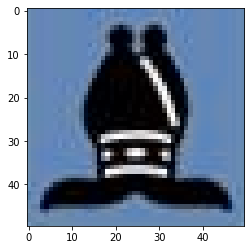

In [29]:
def file_name_to_image_tiles(file_name):
    board_image = cv2.imread(file_name)
    img_h, img_w, _ = board_image.shape
    tile_h, tile_w = img_h // 8, img_w // 8
    tiles = []

    for row in range(0, img_h, tile_h):
        for col in range(0, img_w, tile_w):
            tiles.append(board_image[row:row+tile_h, col:col+tile_h])
    
    return tiles

tiles = file_name_to_image_tiles(image_file_names[0])
plt.imshow(tiles[1])
plt.show()

In [30]:
def store_labeled_image_tiles(file_name, file_number):
    label_array = ''.join(file_name_to_label_array(file_name))
    tiles = file_name_to_image_tiles(file_name)

    for i in range(64):
        new_file_name = 'tiles/' + str(file_number).zfill(4) + str(i).zfill(2) + label_array[i] + '.jpg'
        cv2.imwrite(new_file_name, tiles[i])

for i in range(1000):
    store_labeled_image_tiles(image_file_names[i], i)